# Análise Exploratória 

In [12]:
import os
import sys
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
import folium

import geopandas as gpd
import pandas as pd
import numpy as np

from database.connection import connection
from database.engine import engine
from database.fetch_bus_data import fetch_bus_data
from database.get_table_structure import get_table_structure
from IPython.display import display
from visualization.plot_bus_route import plot_bus_route
from visualization.save_folium_as_png import save_folium_as_png


In [2]:
# Exemplo de uso
table_structure = get_table_structure()
print(table_structure)


        column_name                    data_type  nullable
0                id                      integer  NOT NULL
1             ordem                         text      NULL
2              geom        geography(Point,4326)      NULL
3          datahora  timestamp without time zone  NOT NULL
4        velocidade             double precision      NULL
5             linha                         text      NULL
6     datahoraenvio  timestamp without time zone      NULL
7  datahoraservidor  timestamp without time zone      NULL


Buscando linha 371...
Plotando pontos da linha 371...


/tmp/ipykernel_28854/347137674.py:11: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  bus_data.plot(column='id', figsize=(10, 10), markersize=30, color='red', alpha=min(1, 50/num_of_points))


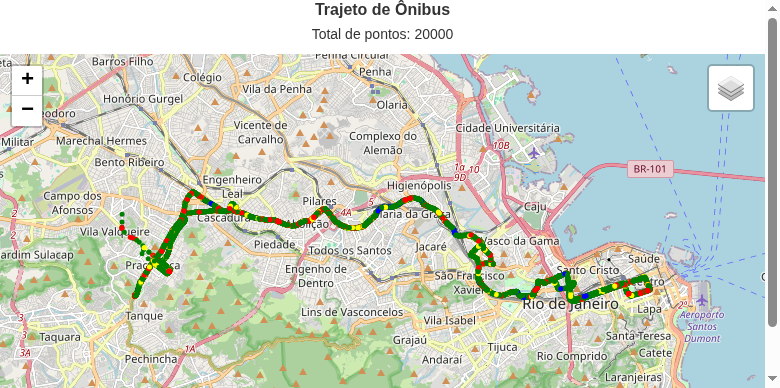

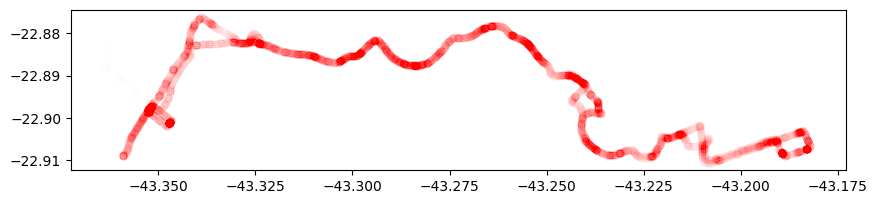

In [13]:
linha = '371'
num_of_points = 20000

print(f"Buscando linha {linha}...")

bus_data = fetch_bus_data(engine, linha, limit=num_of_points)
bus_data.head()

print(f"Plotando pontos da linha {linha}...")

bus_data.plot(column='id', figsize=(10, 10), markersize=30, color='red', alpha=min(1, 50/num_of_points))

mapa = plot_bus_route(bus_data)
mapa.save(f'../../output/trajectories/HTML/{linha}.html')

# # Exibir o mapa no Jupyter Notebook (pesado para mais de 10k pontos))
# display(mapa)

# Salvar o mapa como PNG e exibe (versão mais leve do que o interativo)
save_folium_as_png(mapa, f'../../output/trajectories/PNG/{linha}.png')
display(Image(filename=f'../../output/trajectories/PNG/{linha}.png'))